In [1]:
import pandas as pd
import numpy as np
import glob
import re

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
# reading the data generated with MInt program. 

h_data = pd.read_excel('tables/LSARP-SA017-SA028-StandardizationWorkbook.xlsx')
h_data.rename(columns={'peak_label':'ms_file'}, inplace = True)
h_data.head()

,ms_file,Acetoacetate,Acetyl-Threonine,Adenine,Adenosine,Adenosine monophosphate,Alanine,Alpha Ketoglutarate,Arabitol,Arginine,...,Trehalose,Tryptophan,Tyrosine,Uracil,Uric Acid,Uridine,Urocanate,Valine,Xanthine,Xanthosine
0,SA017_G0_T0_210824_HILICNeg4S_Col01_RN00001_SG...,38769.562500,99432.625000,40837.019531,0.0,0.0,0.0,0.0,27217.703125,7704.150391,...,0.0,0.0,35096.058594,559394.437500,14849.876953,9372.165039,12527.451172,5363.128418,9698.546875,14746.850586
1,SA017_G0_T0_210824_HILICNeg4S_Col01_RN00002_SG...,5523.935547,36725.281250,5955.994141,0.0,0.0,0.0,0.0,5307.433594,0.000000,...,0.0,0.0,0.000000,62193.316406,0.000000,0.000000,7360.108887,0.000000,4639.914062,0.000000
2,SA017_G0_T0_210824_HILICNeg4S_Col01_RN00003_SG...,4875.492676,19740.859375,11985.923828,0.0,0.0,0.0,0.0,4676.052246,0.000000,...,0.0,0.0,0.000000,62356.007812,5584.253418,0.000000,10115.181641,0.000000,6860.153320,0.000000
3,SA017_G0_T0_210824_HILICNeg4S_Col01_RN00004_SG...,5282.085449,3926.036621,5667.062988,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,58015.597656,0.000000,0.000000,5472.426758,3497.700439,4149.112793,0.000000
4,SA017_G0_T0_210824_HILICNeg4S_Col01_RN00005_A1...,8921.168945,94394.765625,18593.052734,0.0,0.0,0.0,0.0,13991.824219,0.000000,...,0.0,0.0,0.000000,54272.964844,3612.699219,7079.906250,26118.632812,0.000000,13583.148438,6563.714355


In [12]:
# getting the sample type by reading the file name 

def sample_type(string):
    if ('Std' in string) or ('STD' in string) or ('std' in string):
        return 'Std'
    if ('Blank' in string) or ('blank' in string):
        return 'Blank'
    if ('MHPool' in string) or ('MHPOOL' in string) or ('MHpool' in string):
        return 'MHPool'
    if ('SAPool' in string) or ('SAPOOL' in string) or ('SApool' in string):
        return 'SAPool'
    if 'ATCC' in string:
        return 'ATCC'
    return 'Bi'

h_data['Date'] = h_data.ms_file.apply(lambda x: re.findall(r'_(\d{6})', x)[0])
h_data['Col'] = h_data.ms_file.apply(lambda x: 'Col'+ re.findall(r'Col(\d{2})', x)[0])
h_data['SType'] = h_data.ms_file.apply(lambda x: sample_type(x))
h_data['Batch'] = h_data.ms_file.apply(lambda x: x[:5])

In [13]:
h_data.head()

,ms_file,Acetoacetate,Acetyl-Threonine,Adenine,Adenosine,Adenosine monophosphate,Alanine,Alpha Ketoglutarate,Arabitol,Arginine,...,Uric Acid,Uridine,Urocanate,Valine,Xanthine,Xanthosine,Date,Col,SType,Batch
0,SA017_G0_T0_210824_HILICNeg4S_Col01_RN00001_SG...,38769.562500,99432.625000,40837.019531,0.0,0.0,0.0,0.0,27217.703125,7704.150391,...,14849.876953,9372.165039,12527.451172,5363.128418,9698.546875,14746.850586,210824,Col01,Blank,SA017
1,SA017_G0_T0_210824_HILICNeg4S_Col01_RN00002_SG...,5523.935547,36725.281250,5955.994141,0.0,0.0,0.0,0.0,5307.433594,0.000000,...,0.000000,0.000000,7360.108887,0.000000,4639.914062,0.000000,210824,Col01,Blank,SA017
2,SA017_G0_T0_210824_HILICNeg4S_Col01_RN00003_SG...,4875.492676,19740.859375,11985.923828,0.0,0.0,0.0,0.0,4676.052246,0.000000,...,5584.253418,0.000000,10115.181641,0.000000,6860.153320,0.000000,210824,Col01,Blank,SA017
3,SA017_G0_T0_210824_HILICNeg4S_Col01_RN00004_SG...,5282.085449,3926.036621,5667.062988,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,5472.426758,3497.700439,4149.112793,0.000000,210824,Col01,Blank,SA017
4,SA017_G0_T0_210824_HILICNeg4S_Col01_RN00005_A1...,8921.168945,94394.765625,18593.052734,0.0,0.0,0.0,0.0,13991.824219,0.000000,...,3612.699219,7079.906250,26118.632812,0.000000,13583.148438,6563.714355,210824,Col01,Std,SA017


In [14]:
# sorting the table by column and batch and filtering to select only the column 2

h_data.sort_values(by = ['Col', 'Batch'], inplace = True)
h_data = h_data[h_data.Col == 'Col02']

In [15]:
h_data.columns

Index(['ms_file', 'Acetoacetate', 'Acetyl-Threonine', 'Adenine', 'Adenosine',
       'Adenosine monophosphate', 'Alanine', 'Alpha Ketoglutarate', 'Arabitol',
       'Arginine', 'Asparagine', 'Aspartate', 'Biotin', 'Carnosine',
       'Citrulline', 'Creatinine', 'Cysteic Acid', 'Cysteine', 'Cystine',
       'Cytidine', 'Cytosine', 'DihydroOrotate', 'Folate',
       'Fructose1-6 Bisphosphate', 'Fumarate', 'Glucose',
       'Glucose-6-Phosphate', 'Glutamate', 'Glutamine', 'Guanine', 'Guanosine',
       'Hippurate', 'Histidine', 'Hypoxanthine', 'Inosine', 'Isoleucine',
       'Itaconate', 'Leucine', 'Lysine', 'Methionine', 'Methionine Sulfoxide',
       'Mevalonate acid', 'Myoinositol', 'N-Acetyl-Aspartate',
       'N-Acetyl-Glucosamine', 'N-Acetyl-Glutamate', 'N-Acetyl-Glutamine',
       'N-Acetyl-Glycine', 'N-Acetyl-Leucine', 'N-Acetyl-Methionine',
       'N-Acetyl-Phenylalanine', 'Nicotinate', 'O-Phospho-L-Serine',
       'Ornithine', 'Orotate', 'Panthothenic acid', 'Phenylalanine', 'Pr

In [16]:
data_consumption = h_data.copy()
data_consumption = data_consumption.fillna(0)
for col in  data_consumption.columns[1:-4]:
    data_consumption[col] = data_consumption[col] / np.mean(data_consumption.loc[(data_consumption.SType == 'MHPool') & (data_consumption[col] > 0.0000000001) , col])

for col in  data_consumption.columns[1:-4]:
    data_consumption[col] = np.log(data_consumption[col] + 0.00000001) - 1
    
consumption_resume = pd.DataFrame()
consumption_resume['Compound'] = data_consumption.columns[1:-4]
consumption_resume['Flux_mean'] = 0
consumption_resume['Std'] = 0

for cp in consumption_resume.Compound:
    consumption_resume.loc[consumption_resume.Compound == cp, 'Flux_mean'] = np.mean(data_consumption[cp][(data_consumption.SType == 'Bi') & (data_consumption[cp] > -15)])
    consumption_resume.loc[consumption_resume.Compound == cp, 'Std'] = np.std(data_consumption[cp][data_consumption.SType == 'Bi'])/np.sqrt(len(data_consumption[cp][data_consumption.SType == 'Bi']))

consumption_resume['Flux_min'] = consumption_resume.Flux_mean - consumption_resume.Std
consumption_resume['Flux_max'] = consumption_resume.Flux_mean + consumption_resume.Std

consumption_resume.to_csv('tables/resume_consumption_negative_mode_with_peak_max.csv')

In [17]:
fluxes = consumption_resume.sort_values(by = 'Flux_mean').reset_index(drop = True)[['Compound', 'Flux_mean', 'Std', 'Flux_min', 'Flux_max']]
fluxes

,Compound,Flux_mean,Std,Flux_min,Flux_max
0,Glucose,-4.842576,0.033993,-4.876569,-4.808584
1,Xanthine,-4.576143,0.311888,-4.888031,-4.264255
2,Arginine,-3.974989,0.066876,-4.041866,-3.908113
3,Uridine,-3.947937,0.131722,-4.079659,-3.816216
4,Adenine,-3.840403,0.020386,-3.860789,-3.820018
...,...,...,...,...,...
72,N-Acetyl-Methionine,0.559564,0.014641,0.544924,0.574205
73,Mevalonate acid,1.525185,0.018991,1.506194,1.544176
74,Cysteine,NaN,NaN,NaN,NaN
75,Folate,NaN,NaN,NaN,NaN


In [18]:
# selecting metabs with proper and consistent signals across the batches

metabs = ['Acetoacetate', 'Acetyl-Threonine', 'Adenine', 'Arabitol', 'Arginine', 'Asparagine', 'Biotin', 'Serine','Aspartate',
         'Fumarate', 'Glucose','Alanine','Alpha Ketoglutarate',
       'Glucose-6-Phosphate', 'Glutamine','Trehalose','Glutamine','Glutamate',
       'Hippurate', 'Histidine', 'Hypoxanthine', 'Inosine',
       'Itaconate', 'Methionine', 'Methionine Sulfoxide', 'N-Acetyl-Aspartate',
       'N-Acetyl-Glutamate', 'N-Acetyl-Glutamine',
       'N-Acetyl-Glycine', 'N-Acetyl-Leucine', 'N-Acetyl-Methionine',
       'N-Acetyl-Phenylalanine', 'Nicotinate', 'O-Phospho-L-Serine', 'Panthothenic acid', 'Phenylalanine',
       'Pyridoxine', 'Rhamnose', 'Riboflavin', 'Shikimate',
       'Succinate',  'Threonine', 'Thymidine', 'Thymine', 'Uridine',
       'Urocanate',  'Xanthine', 'Xanthosine']

In [19]:
fluxes = fluxes[fluxes.Compound.apply(lambda x: x in metabs)]

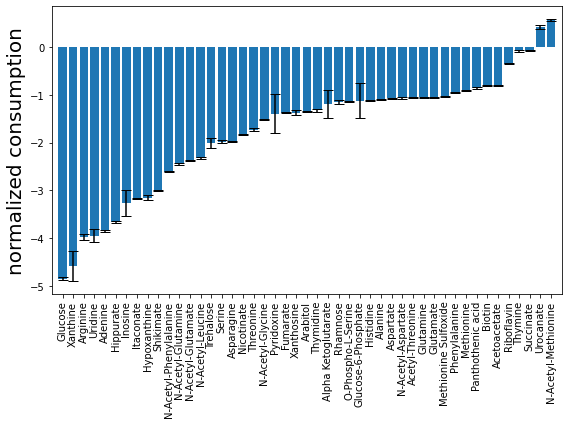

In [20]:
materials = np.array(fluxes.Compound)
x_pos = range(len(fluxes))
CTEs = np.array(fluxes.Flux_mean)
error = np.array(fluxes.Std)


fig, ax = plt.subplots(figsize = (8, 6))
ax.bar(x_pos, CTEs, yerr=error,   ecolor='black', capsize=5)
ax.set_ylabel('normalized consumption', fontsize = 20)
ax.set_xticks(x_pos)
ax.set_xticklabels(materials, rotation = 90)
# ax.yaxis.grid(True)

# Save the figure and show
plt.xlim(-1,len(fluxes))
# plt.yscale('log')
plt.tight_layout()
plt.savefig('consumption_plots/bar_plot_with_error_bars_normalized_consumption_with_peak_max.png', dpi = 700)
plt.show()